### Esercitazione 7

In questa simulazione è stato studiato il comportamento di un liquido sia tramite Monte Carlo (NVT) che Molecular Dynamics (NVE).

Nel caso delle simulazioni Monte Carlo, sono stati usati $M = 5 \times 10^5$ step con $N=1$ blocchi, $dt=0.102$ per MC in modo da mantenere il tasso di accettazione delle mosse di Metropolis attorno al 50% e $dt=0.001$ per MD.
Il sistema è stato equilibrato prima di iniziare la raccolta dei dati, evitando che valori non stazionari contaminassero le osservazioni.

Nelle figure seguenti viene mostrata l'autocorrelazione dell'energia potenziale per particella, calcolata per entrambe le simulazioni. Questo studio è fondamentale per stimare la lunghezza di correlazione e quindi determinare una dimensione adeguata dei blocchi da usare nella tecnica di data blocking, in modo da ottenere una stima affidabile dell'incertezza statistica.


In [28]:
import matplotlib.pyplot as plt
import numpy as np

dati=np.loadtxt("AutoCorrMC.dat",max_rows=1000)
err=np.loadtxt("ErroriMC.dat")

datiAD=np.loadtxt("AutoCorrMD.dat",max_rows=1000)
errAD=np.loadtxt("ErroriMD.dat")
x=[]
for i in range (1,100):
    x.append(10*i)

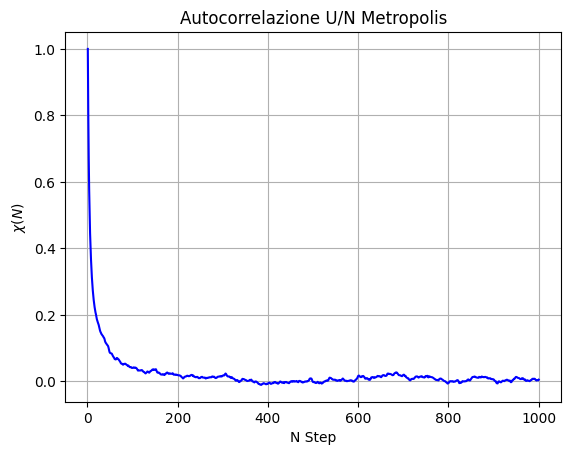

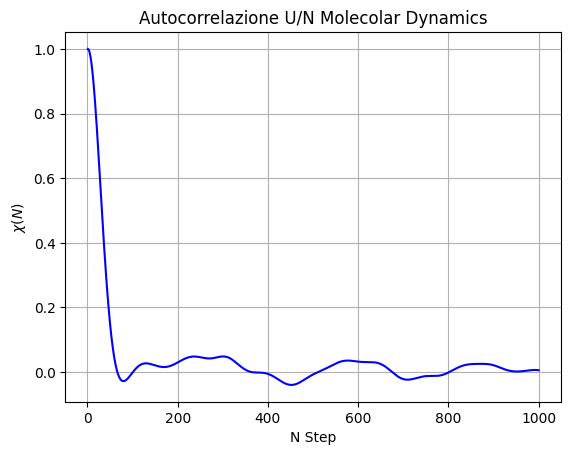

In [29]:
#autocorrelazione metropolis

plt.plot(range(1,1001),dati,color="blue")
plt.grid()
plt.title("Autocorrelazione U/N Metropolis")
plt.xlabel("N Step")
plt.ylabel("$\chi(N)$")
plt.show()
plt.close()

#autocorrelazione molecolar dynamics


plt.plot(range(1,1001),datiAD,color="blue")
plt.grid()
plt.title("Autocorrelazione U/N Molecolar Dynamics")
plt.xlabel("N Step")
plt.ylabel("$\chi(N)$")
plt.show()
plt.close()

A partire dagli stessi dati, è stata eseguita un’analisi dell’incertezza statistica sul valore medio dell’energia potenziale per particella in funzione della dimensione del blocco $L = M/N$, facendo variare $L$ da 10 fino a $5 \times 10^3$.Il grafico sottostante mostra come l’incertezza statistica inizialmente cresca fino a stabilizzarsi: questo comportamento conferma la validità della tecnica del data blocking una volta superata la lunghezza di correlazione del sistema.



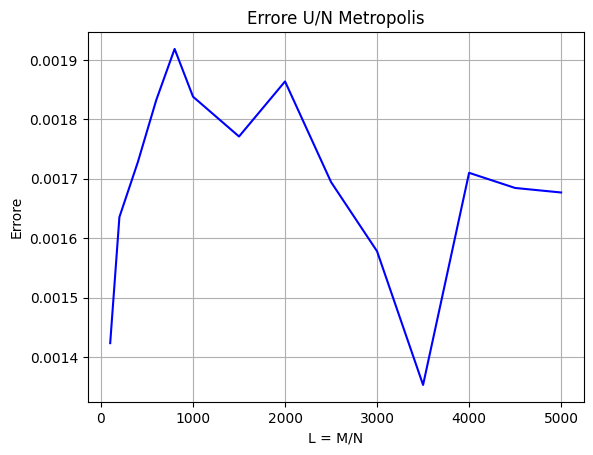

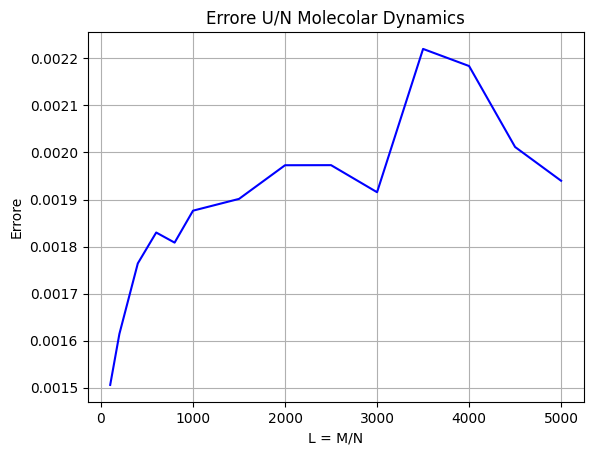

In [30]:
#errore in funzione di L metropolis
L=[100,200,400,600,800,1000,1500,2000,2500,3000,3500,4000,4500,5000]
plt.plot(L,err,color="blue")
plt.grid()
plt.title("Errore U/N Metropolis")
plt.xlabel("L = M/N")
plt.ylabel("Errore")
plt.show()
plt.close()


#errore in funzione di L molecolar dynamics
L=[100,200,400,600,800,1000,1500,2000,2500,3000,3500,4000,4500,5000]
plt.plot(L,errAD,color="blue")
plt.grid()
plt.title("Errore U/N Molecolar Dynamics")
plt.xlabel("L = M/N")
plt.ylabel("Errore")
plt.show()
plt.close()


Successivamente viene implementato il calcolo della funzione di distribuzione radiale $g(r)$. Per ogni blocco è stata ottenuta una media di $g(r)$, dove è stata calcolata la media finale e le relative incertezze. Questo permette di analizzare nel dettaglio la struttura microscopica del sistema nella fase liquida.

Sono state eseguite sia simulazioni Monte Carlo (NVT) che Molecular Dynamics (NVE) nelle condizioni termodinamiche:$\rho^\star = 0.8$, $T^\star = 1.1$, $r_c = 2.5$.
Sono stati utilizzati $N=20$ blocchi da $M=5000$ step per ciascun blocco.

Nei seguenti grafici viene riportato l' andamento dei valori della temperatura, della pressione e di $g(r)$ per entrambe le simulazioni:


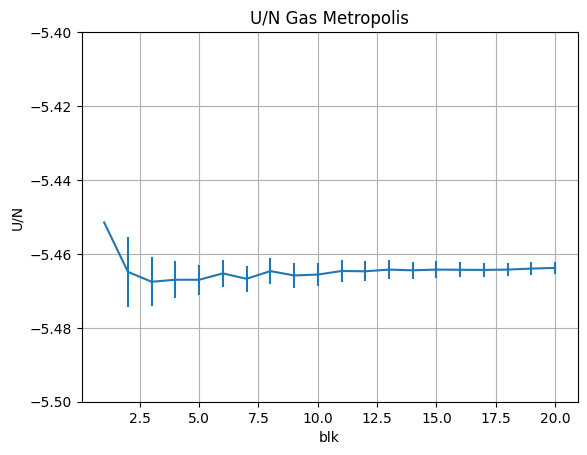

In [31]:
#energy MC

dati3=np.loadtxt("potential_energyMC.dat",skiprows=1)
blk=dati3[:,0]
uenergy=dati3[:,2]
erru=dati3[:,3]

plt.errorbar(blk,uenergy,yerr=erru)
plt.grid()
plt.ylim(-5.5,-5.4)
plt.title("U/N Gas Metropolis")
plt.xlabel("blk")
plt.ylabel("U/N")
plt.show()
plt.close()


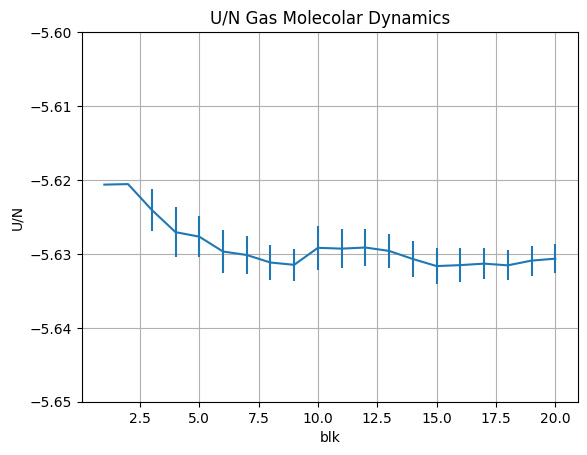

In [32]:
#energy MD

dati3=np.loadtxt("potential_energyMD.dat",skiprows=1)
blk=dati3[:,0]
uenergy=dati3[:,2]
erru=dati3[:,3]

plt.errorbar(blk,uenergy,yerr=erru)
plt.grid()
plt.ylim(-5.65,-5.6)
plt.title("U/N Gas Molecolar Dynamics")
plt.xlabel("blk")
plt.ylabel("U/N")
plt.show()
plt.close()

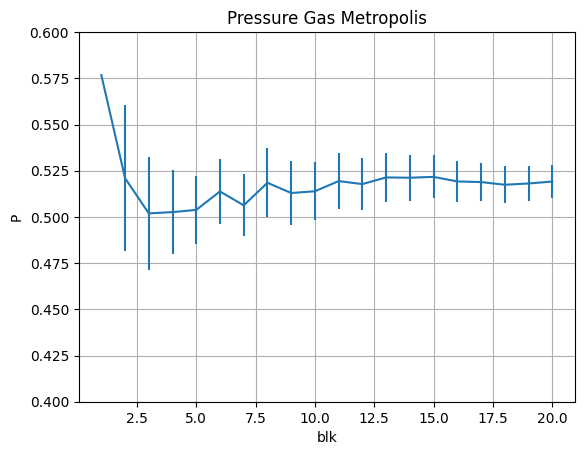

In [33]:
#pressure MC
dati2=np.loadtxt("pressureMC.dat",skiprows=1)
blk=dati2[:,0]
pres=dati2[:,2]
errp=dati2[:,3]

plt.errorbar(blk,pres,yerr=errp)
plt.grid()
plt.ylim(0.4,0.6)
plt.title("Pressure Gas Metropolis")
plt.xlabel("blk")
plt.ylabel("P")
plt.show()
plt.close()


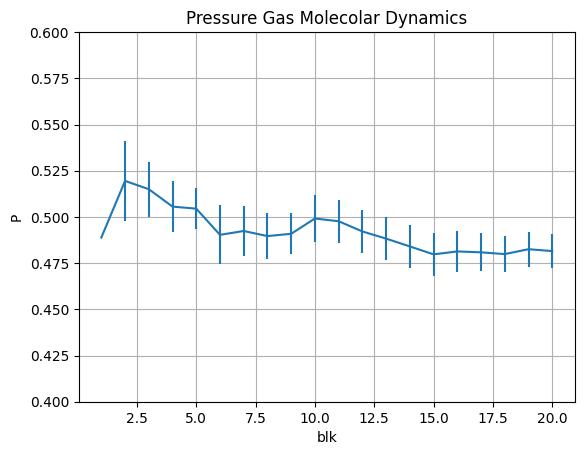

In [34]:
#pressure MD
dati2=np.loadtxt("pressureMD.dat",skiprows=1)
blk=dati2[:,0]
pres=dati2[:,2]
errp=dati2[:,3]

plt.errorbar(blk,pres,yerr=errp)
plt.grid()
plt.title("Pressure Gas Molecolar Dynamics")
plt.xlabel("blk")
plt.ylabel("P")
plt.ylim(0.4,0.6)
plt.show()
plt.close()


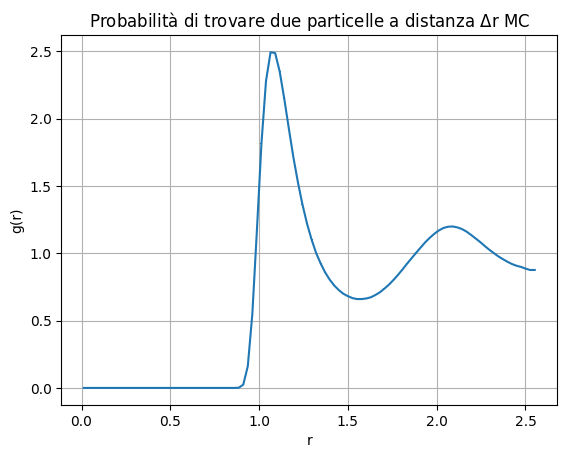

In [35]:
#gofr metropolis
dati=np.loadtxt("gofrMC.dat",skiprows=1)
r=dati[:,0]
gofr=dati[:,1]
errg=dati[:,2]
plt.errorbar(r,gofr,yerr=errg)
plt.grid()
plt.title("Probabilità di trovare due particelle a distanza $\Delta$r MC")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.show()
plt.close()

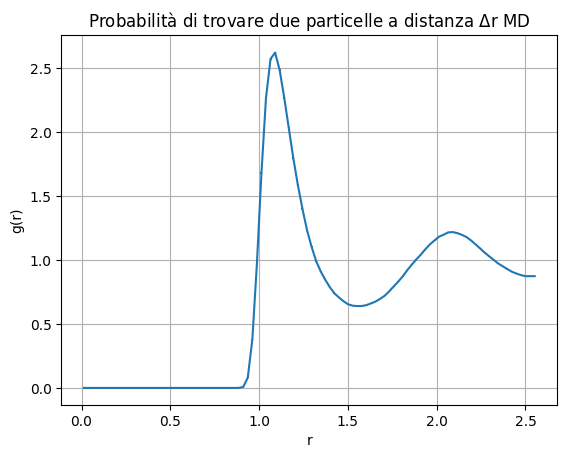

In [36]:

#gofr molecolar dynamics
dati=np.loadtxt("gofrMD.dat",skiprows=1)
r=dati[:,0]
gofr=dati[:,1]
errg=dati[:,2]
plt.errorbar(r,gofr,yerr=errg)
plt.grid()
plt.title("Probabilità di trovare due particelle a distanza $\Delta$r MD")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.show()
plt.close()

Come si può osservare dai grafici, le due metodologie forniscono risultati compatibili, confermando la correttezza dell’implementazione e la coerenza del comportamento fisico del sistema modellato.